# Introduction to Deep Learning in Python


## Basics of deep learning and neural networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.array([2,3])
weights = {'node_0': np.array([1,1]),
            'node_1': np.array([-1,1]),
            'output': np.array([2,-1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()
hidden_layer_values = np.array([node_0_value, node_1_value])
output = (hidden_layer_values * weights['output']).sum()
print(hidden_layer_values,output)

[5 1] 9


### Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:<br>
<img src="https://assets.datacamp.com/production/course_3524/datasets/1_4.png"><br><br>
Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.<br>

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].<br>

The weights feeding into the output node are available in weights['output'].<br>

NumPy will be pre-imported for you as np in all exercises.

In [3]:
input_data = np.array([3, 5])
weights = {'node_0':np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [4]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


### Activation functions

#### ReLU Rectified Linear Activation

$$

\begin{equation}
  RELU(x) =
    \begin{cases}
      0 & \text{if x < 0}\\
      1 & \text{if x <= 0}
    \end{cases}       
\end{equation}

$$

In [5]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}


In [6]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


In [7]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

In [8]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row,weights))

# Print results
print(results)     

[52, 63, 0, 148]


### Deeper networks

In [9]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
            'node_0_1': np.array([ 4, -5]),
            'node_1_0': np.array([-1,  2]),
            'node_1_1': np.array([1, 2]),
            'output': np.array([2, 7])}
            

In [10]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = relu((hidden_1_outputs * weights['output']).sum())
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


### The need for optimization

In [11]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [12]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [13]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1. , 1.5]), 'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]

In [14]:
#pip install -U scikit-learn
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row,weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row,weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals,model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals,model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


### Gradient descent

In [15]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


In [16]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - (learning_rate * slope) 

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


In [20]:
def get_slope(input_data, target,weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return 2 * input_data * error 

In [21]:
def get_mse(input_data, target,weights):
    preds = (weights * input_data).sum()
    error_2 = preds - target
    #x=((error_2+error)/2)^0.5
    return error_2

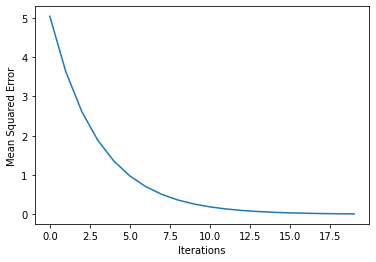

In [22]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data,  target,weights)
    
    # Update the weights: weights
    weights = weights - slope * 0.01
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target,weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation

In [1]:
1

1

# Creating a Keras model

In [2]:
from tensorflow.keras.layers import Dense

: 

: 

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Would remove:
    /Users/hadi/opt/anaconda3/envs/py/bin/estimator_ckpt_converter
    /Users/hadi/opt/anaconda3/envs/py/bin/import_pb_to_tensorboard
    /Users/hadi/opt/anaconda3/envs/py/bin/saved_model_cli
    /Users/hadi/opt/anaconda3/envs/py/bin/tensorboard
    /Users/hadi/opt/anaconda3/envs/py/bin/tf_upgrade_v2
    /Users/hadi/opt/anaconda3/envs/py/bin/tflite_convert
    /Users/hadi/opt/anaconda3/envs/py/bin/toco
    /Users/hadi/opt/anaconda3/envs/py/bin/toco_from_protos
    /Users/hadi/opt/anaconda3/envs/py/lib/python3.9/site-packages/tensorflow-2.11.0.dist-info/*
    /Users/hadi/opt/anaconda3/envs/py/lib/python3.9/site-packages/tensorflow/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
